# Effective Graph Paper
Code to generate "Figure 2 - Edge Effectiveness"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
dfB = pd.read_csv('../Figure 2/BioNetworkEdgeEffectiveness.csv')
dfBR = pd.read_csv('../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv', index_col=0)

FileNotFoundError: [Errno 2] File b'../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv' does not exist: b'../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv'

In [ ]:
dfBk6 = dfB.loc[dfB['Degree'] == 6, :]
eck6 = dfBk6['EC']
#

dfBRk6 = dfBR.loc[dfBR['Degree'] == 6, :]
ecginik6 = dfBRk6.groupby(['BioBN','Node','Input']).agg({'ECgini':'first'})

In [5]:
dfBRk6

NameError: name 'dfBRk6' is not defined

In [6]:
# Calc Gini Coefficient
def calc_gini_coef(a, epsilon=10**(-6) ):
    """Calculate the Gini coefficient of a numpy array."""
    n = np.array(a).shape[0] #number of array elements
    index = np.arange(1, (n + 1)) #index per array element
    a += epsilon #values cannot be 0
    return ((np.sum((2 * index - n  - 1) * np.sort(a))) / (n * np.sum(a))) #Gini coefficient

In [8]:
# Load bias.tar.gz file
bias_tarfile = tarfile.open('bias.tar.gz')
#
rand_edge_eff = []
rand_gini = []
for bias in range(1,33):
    print("Bias: {bias:d}".format(bias=bias))
    # Filename
    filename = 'data/bias{bias:d}.csv'.format(bias=bias)
    # Get tar member
    member = bias_tarfile.getmember(filename)
    # Extract .csv from tar
    bias_file = bias_tarfile.extractfile(member)
    # read to DataFrame
    dfb = pd.read_csv(bias_file)
    sg = dfb.apply(calc_gini_coef, axis='columns')
    #
    vals = dfb.values.flatten()
    gini = sg.values
    #
    rand_edge_eff.append(vals)
    rand_gini.append(gini)


Bias: 1
Bias: 2
Bias: 3


KeyboardInterrupt: 

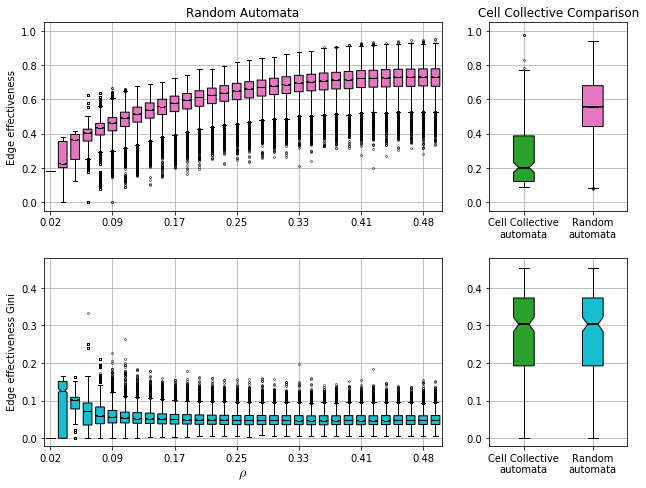

In [29]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.5,7), sharex=False, sharey=False)
#ax1, ax2, ax3, ax4 = axes.flatten()
fig = plt.figure(constrained_layout=False, figsize=(9,7))
gs = gridspec.GridSpec(ncols=16, nrows=2, figure=fig)
s = 11
ax1 = fig.add_subplot(gs[0, 0:s])
ax2 = fig.add_subplot(gs[0, s+1:])
ax3 = fig.add_subplot(gs[1, 0:s])
ax4 = fig.add_subplot(gs[1, s+1:])

#
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', markeredgewidth=.5, rasterized=False)
medianprops = dict(color='black')

# Ax1 
res1 = ax1.boxplot(rand_edge_eff, notch=True, patch_artist=True, widths=0.7,
                  flierprops=flierprops, boxprops=dict(facecolor='#e377c2'), medianprops=medianprops)
    
xticks = np.arange(1, 32, 5)
xticklables = np.round(xticks / 64, 2)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklables)
#
ax1.set_title(r"Random Automata")
ax1.set_ylabel('Edge effectiveness')
ax1.grid()
ax1.set_ylim(-0.05,1.05)

# Ax3
res3 = ax3.boxplot(rand_gini, notch=True, patch_artist=True, widths=0.7,
                 flierprops=flierprops, boxprops=dict(facecolor='#17becf'), medianprops=medianprops)

xticks = np.arange(1, 32, 5)
xticklables = np.round(xticks / 64, 2)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklables)
#
#ax.set_title(r"Random Automata Gini")
ax3.set_ylabel('Edge effectiveness Gini')
ax3.set_xlabel(r'$\rho$', fontsize='x-large')
ax3.grid()
ax3.set_ylim(-0.02,0.48)

# Ax2
res = ax2.boxplot([dfBk6['EC'], dfBRk6['EC']], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

colors = ['#2ca02c', '#e377c2']
for box, median, color in zip(res['boxes'], res['medians'], colors):
    box.set_facecolor(color)
    median.set_c('k')
    median.set_lw(2)

ax2.set_xticks(range(1,3))
ax2.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'])
ax2.set_title("Cell Collective Comparison")
ax2.grid()
ax2.set_ylim(-0.05,1.05)

# Ax4
res = ax4.boxplot([dfBk6['ECgini'], ecginik6], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

colors = ['#2ca02c', '#17becf']
for box, median, color in zip(res['boxes'], res['medians'], colors):
    box.set_facecolor(color)
    median.set_c('k')
    median.set_lw(2)

ax4.set_xticks(range(1,3))
ax4.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'])
ax4.grid()
ax4.set_ylim(-0.02,0.48)

plt.subplots_adjust(left=0.07, right=0.97, bottom=0.08, top=0.92, wspace=0.4, hspace=0.25)
plt.savefig("EdgeEffectivenessComposite.pdf")
plt.show()